In [1]:
import pandas as pd
import numpy as np
import pretty_midi as pm
import copy
import matplotlib.pyplot as plt
import pandas as pd
import os
from nmp import dataset, ev_metrics
# from dataset import plot_piano_roll
from pathlib import Path
# from plotter import smooth
import time
import math
import pypianoroll
from pypianoroll import Multitrack, Track

In [2]:
P = Path(os.path.abspath(''))  # Compatible with Jupyter Notebook

(144, 128)


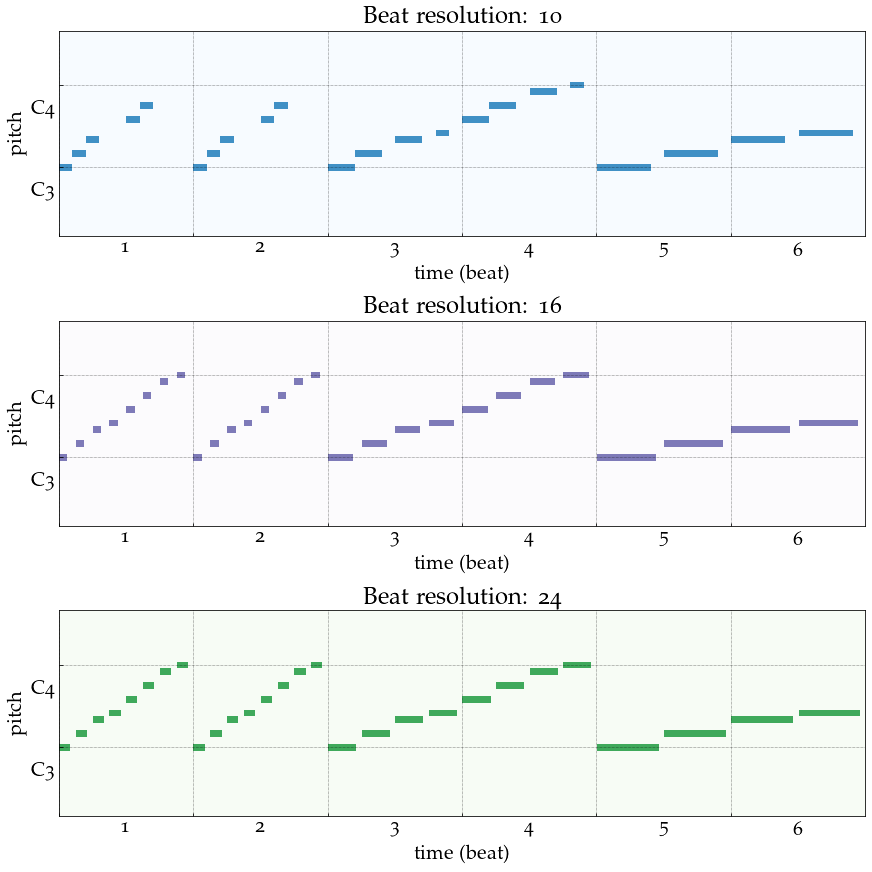

In [3]:
import matplotlib
from matplotlib import rc
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams["figure.constrained_layout.use"] = True
matplotlib.rcParams['mathtext.rm'] = 'custom'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['font.family'] = 'custom'
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{classicthesis}')
plt.rcParams.update({'font.size': 20})

fig, (ax1, ax3, ax2) = plt.subplots(3, 1, constrained_layout=True)

BR = 10
db = list(range(1, BR))
pr = pypianoroll.parse(str(P / "midi_tests/2.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax1, pr.get_merged_pianoroll(), beat_resolution=BR)
ax1.set_title("Beat resolution: %d" % BR)
ax1.set_ylim([50, 80])

BR = 16
db = list(range(1, BR))
pr = pypianoroll.parse(str(P / "midi_tests/2.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax3, pr.get_merged_pianoroll(), beat_resolution=BR, cmap='Purples')
ax3.set_title("Beat resolution: %d" % BR)
ax3.set_ylim([50, 80])

BR = 24
db = list(range(1, BR))
pr = pypianoroll.parse(str(P / "midi_tests/2.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax2, pr.get_merged_pianoroll(), beat_resolution=BR, cmap='Greens')
ax2.set_title("Beat resolution: %d" % BR)
ax2.set_ylim([50, 80])

# plt.savefig('mostrare-ars.eps', format='eps')
# plt.savefig('mostrare-ars.png', dpi=300)
print(pr.get_merged_pianoroll().shape)

(144, 128)


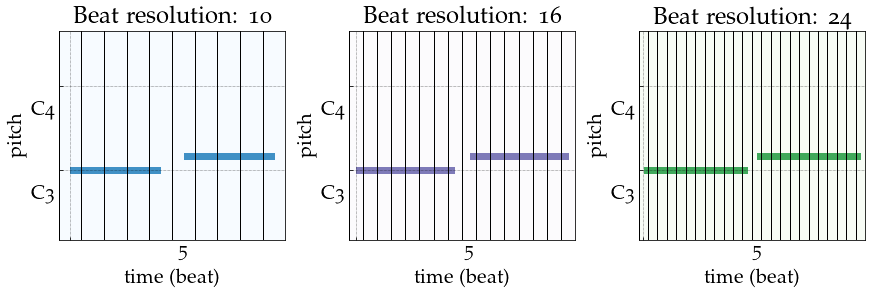

In [4]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["figure.constrained_layout.use"] = True

# from matplotlib import rc
# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{classicthesis}')
# plt.rcParams.update({'font.size': 20})

fig, (ax1, ax3, ax2) = plt.subplots(1, 3, constrained_layout=True)

BR = 10
db = list(range(4*BR-1, 4*BR-1+BR))
pr = pypianoroll.parse(str(P / "midi_tests/2.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax1, pr.get_merged_pianoroll(), beat_resolution=BR, downbeats=db)
ax1.set_title("Beat resolution: %d" % BR)
ax1.set_ylim([50, 80])
ax1.set_xlim([4*BR-1, 4*BR-1+BR])

BR = 16
db = list(range(4*BR-1, 4*BR-1+BR))
pr = pypianoroll.parse(str(P / "midi_tests/2.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax3, pr.get_merged_pianoroll(), beat_resolution=BR, cmap='Purples', downbeats=db)
ax3.set_title("Beat resolution: %d" % BR)
ax3.set_ylim([50, 80])
ax3.set_xlim([4*BR-1, 4*BR-1+BR])

BR = 24
db = list(range(4*BR-1, 4*BR-1+BR))
pr = pypianoroll.parse(str(P / "midi_tests/2.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax2, pr.get_merged_pianoroll(), beat_resolution=BR, cmap='Greens', downbeats=db)
ax2.set_title("Beat resolution: %d" % BR)
ax2.set_ylim([50, 80])
ax2.set_xlim([4*BR-1, 4*BR-1+BR])

# plt.savefig('mostrare-ars.eps', format='eps')
# plt.savefig('mostrare-ars.png', dpi=300)
print(pr.get_merged_pianoroll().shape)

In [5]:
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["figure.constrained_layout.use"] = True

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{classicthesis}')
plt.rcParams.update({'font.size': 20})

fig, (ax2) = plt.subplots(1, 1, constrained_layout=True)

# BR = 24
# db = list(range(0, 10))
# pr = pypianoroll.parse(str(P / "midi_tests/2-ext.mid"), BR, name='unknown')
# pypianoroll.plot_pianoroll(ax0, pr.get_merged_pianoroll(), beat_resolution=BR, cmap='Greens', downbeats=[9.5])
# ax0.set_title("24 timesteps per beat")
# ax0.set_ylim([50, 80])
# ax0.set_xlim([-0.5, 23.5])

# BR = 24
# db = list(range(0, 10))
# pr = pypianoroll.parse(str(P / "midi_tests/2-ext.mid"), BR, name='unknown')
# pypianoroll.plot_pianoroll(ax1, pr.get_merged_pianoroll(), beat_resolution=BR, cmap='Greens', downbeats=[9.5])
# ax1.set_title("24 timesteps per beat")
# ax1.set_ylim([50, 80])
# ax1.set_xlim([-0.5, 119.5])
# # ax1.set_xlim([4*BR-1, 4*BR-1+BR])

downed = pr.get_merged_pianoroll()
downed = dataset.downsample_roll(downed, 10, 12)
BR = 24
db = list(range(1, 10))
pr = pypianoroll.parse(str(P / "midi_tests/2-ext.mid"), BR, name='unknown')
pypianoroll.plot_pianoroll(ax2, downed, beat_resolution=2, cmap='Blues', xtick='beat', downbeats=[9.5])
ax2.set_title("2 timesteps per beat")
ax2.set_ylim([50, 80])
ax2.set_xlim(-0.5, 11.5)

# plt.savefig('mostrare-ars.eps', format='eps')
# plt.savefig('mostrare-ars-piano2.png', dpi=300)
print(pr.get_merged_pianoroll().shape)

(192, 128)


TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\Paolo\.matplotlib\tex.cache\023b9766170b9629b7ef374e3dcd53c1.tex.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.